In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vb = pd.read_csv('vlaams_belang.csv', index_col=0)
vb

,date,status,id,text,photo,parti
0,Début de diffusion le 14 jan 2020,Actif,ID : 2456367091344308,Tijd voor échte verandering. Ook in Geraardsbe...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
1,Début de diffusion le 13 jan 2020,Inactive,ID : 2521655651492982,"Ondanks eerdere beloftes om niet te besparen, ...",https://scontent.fgva1-1.fna.fbcdn.net/v/t1.64...,Vlaams Belang
2,Début de diffusion le 11 jan 2020,Actif,ID : 3173937022621410,Terwijl poetshulpen staken voor 1% loonopslag ...,NaN,Vlaams Belang
3,Début de diffusion le 8 jan 2020,Actif,ID : 503233856995441,HALLUCINANT. Een gezin dat ILLEGAAL in het lan...,NaN,Vlaams Belang
4,Début de diffusion le 8 jan 2020,Inactive,ID : 510651559810052,Heeft iemand de Koksijdenaren gevraagd of ze e...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
...,...,...,...,...,...,...
325,Début de diffusion le 7 jan 2019,Inactive,ID : 301916850729576,"Immigratie kost € 7,2 miljard/jaar, terwijl on...",https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
326,Début de diffusion le 6 jan 2019,Inactive,ID : 314573155875863,LIKE als je het eens bent!,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
327,Début de diffusion le 4 jan 2019,Inactive,ID : 771284619895377,Stop met het importeren van armoede en bescher...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
328,Début de diffusion le 30 oct 2018,Inactive,ID : 336371940626016,IS-strijders horen NIET thuis in ons land. LIK...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang


## Cleaning

In [3]:
vb['date'] = vb['date'].str.strip('Début de diffusion le ')
vb['date'] = vb['date'].str.replace('déc', 'dec')
vb['date'] = vb['date'].str.replace('aoû', 'aug')
vb['date'] = vb['date'].str.replace('juil', 'jul')
vb['date'] = vb['date'].str.replace('mai', 'may')
vb['date'] = vb['date'].str.replace('avr', 'apr')
vb['date'] = vb['date'].str.replace('fév', 'feb')
vb['date'] = vb['date'].str.split('-').apply(lambda x : x[0])
vb['date'] = pd.to_datetime(vb['date'])
vb.head()

,date,status,id,text,photo,parti
0,2020-01-14,Actif,ID : 2456367091344308,Tijd voor échte verandering. Ook in Geraardsbe...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
1,2020-01-13,Inactive,ID : 2521655651492982,"Ondanks eerdere beloftes om niet te besparen, ...",https://scontent.fgva1-1.fna.fbcdn.net/v/t1.64...,Vlaams Belang
2,2020-01-11,Actif,ID : 3173937022621410,Terwijl poetshulpen staken voor 1% loonopslag ...,NaN,Vlaams Belang
3,2020-01-08,Actif,ID : 503233856995441,HALLUCINANT. Een gezin dat ILLEGAAL in het lan...,NaN,Vlaams Belang
4,2020-01-08,Inactive,ID : 510651559810052,Heeft iemand de Koksijdenaren gevraagd of ze e...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang


In [4]:
vb['id'] = vb['id'].str.strip('ID\xa0: ').astype('int')
vb = vb.set_index('id', drop=True)
vb.head()

,date,status,text,photo,parti
id,,,,,
2456367091344308,2020-01-14,Actif,Tijd voor échte verandering. Ook in Geraardsbe...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
2521655651492982,2020-01-13,Inactive,"Ondanks eerdere beloftes om niet te besparen, ...",https://scontent.fgva1-1.fna.fbcdn.net/v/t1.64...,Vlaams Belang
3173937022621410,2020-01-11,Actif,Terwijl poetshulpen staken voor 1% loonopslag ...,NaN,Vlaams Belang
503233856995441,2020-01-08,Actif,HALLUCINANT. Een gezin dat ILLEGAAL in het lan...,NaN,Vlaams Belang
510651559810052,2020-01-08,Inactive,Heeft iemand de Koksijdenaren gevraagd of ze e...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang


In [5]:
vb['text'] = vb.text.astype('str')

In [6]:
vb.dtypes

date      datetime64[ns]
status            object
text              object
photo             object
parti             object
dtype: object

# Translation
We translate the text in english to go through a sentiment analysis

Because deepL use chunk of max length 5000 char we devide the text into chunks and then reassemble the text.

In [7]:
all_texts = vb.text.to_list()

In [8]:
for i in range(0, len(vb), 20):
    chunk = all_texts[i:i+19]
    text = '§'.join(chunk)
    if(len(text) > 5000):
        print("Bad")
    with open('chunks/text_{}.txt'.format(i), 'w') as file:
        file.write(text)

In [9]:
translated = []
for i in range(0, len(vb), 20):
    with open('chunks/translated/text_{}.txt'.format(i), 'r') as file:
        chunk = file.read()
    texts = chunk.split('§')
    translated += texts

In [10]:
translated_all = '§'.join(translated)
with open('translation.txt', 'w') as file:
    file.write(translated_all)

# Text Analysis

In [11]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import matplotlib.pyplot as plt
%matplotlib inline  

seed = 42
random.seed(seed)
np.random.seed(seed)

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim

#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [24]:
# Lower case and strip
translated = list(map(lambda x: x.lower().strip(), translated))

In [25]:
score_list = []
for text in translated:
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    score_list.append(vs)
scores = pd.DataFrame.from_dict(score_list)

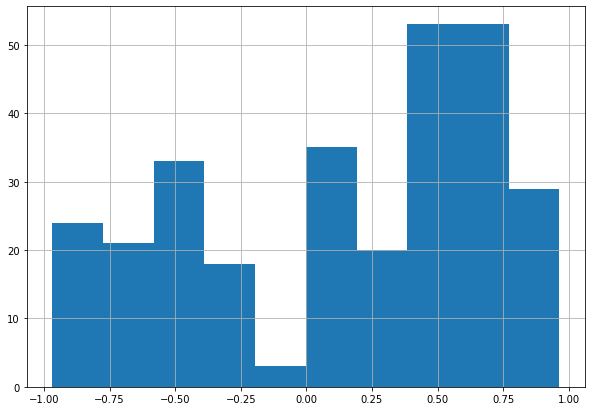

In [26]:
plt.figure(figsize=(10,7))
scores['compound'].hist()
plt.show()

In [27]:
scores = scores.reset_index(drop=False)

In [28]:
neg_index = scores.sort_values(by='compound').head(10).index.to_list()

In [29]:
for index in neg_index:
    print(translated[index])
    print('\n')

waanzin. paul magnette's latest memorandum proposes a new wave of regularisation of illegals. is this what flanders voted for? is this listening to the population, gwendolyn rutten? a nail bomb, a few grenade attacks in one week, shootings with kalashnikovs, arson... the drug war is raging in and around antwerp. mayor bart de wever has lost control and is detecting nergens. the local residents are out in the cold and it's only a matter of time before innocent victims are killed. only a hard approach can work!


a few days ago a truck driver was attacked by illegal aliens in landen. niemand takes his responsibility and the minister even looks away. cd&v, green and pvda do not even bother to condemn this violence. what a shame! from 1 january, more than 600,000 registered cars can only enter an lez with a fine or an extra tax. those who want to enter the city centre in 2027, will only be able to do so with the latest model diesel engine. an anti-social pestbelasting that is being introdu

In [30]:
pos_index = scores.sort_values(by='compound', ascending=False).head(10).index.to_list()
for index in pos_index:
    print(translated[index])
    print('\n')

during the warmest week flanders shows its best side. this widely supported and heartwarming solidarity is part of our flemish identity. we are happy to contribute to this with this action. we donate the entire proceeds to a good cause.  more information or apply for an identity card: www.vlaamsbelang.org/dewarmsteweek


safety is a basic right. it's time to restore the credibility of justice and end impunity. the latest survey by vtm and hln shows that at 14.8% we will be the 3rd largest party in the country!  we still have one more week to convince many more people. give us a hand! on 26 may we have an appointment with history.


in a democracy, every voice counts. thank you voters. you guys are great!   join us today and join the fastest growing party in the country: https://www.vlaamsbelang.org/doe_mee_word_lid/


our first vacancies are online! is working for vlaams belang something for you? don't hesitate, find out via www.vlaamsbelang.org/vacatures and apply today! feel free to 

In [31]:
from spacy.lang.nl.stop_words import STOP_WORDS
chunks = vb.text.str.lower().to_list()

nlp = spacy.load('nl')


processed_docs = list()
for doc in nlp.pipe(chunks, n_threads=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOP_WORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
docs = processed_docs
del processed_docs

/Users/lamborellemaxime/anaconda3/envs/ada/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/Users/lamborellemaxime/anaconda3/envs/ada/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/Users/lamborellemaxime/anaconda3/envs/ada/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/Users/lamborellemaxime/anaconda3/envs/ada/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/Users/lamborellemaxime/anaconda3/envs/ada/lib/python3.7/site-packages/msgpack_numpy.py:184: DeprecationWarning: encoding is deprecated, Use raw=False instead.
  return _unpackb(packed, **kwargs)
/Users/lamborellemax

In [32]:
# Add bigrams too
from gensim.models.phrases import Phrases

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [33]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 226
Number of chunks: 330


In [34]:
# models
from gensim.models import LdaMulticore
params = {'passes': 10, 'random_state': seed}
base_models = dict()
model = LdaMulticore(corpus=corpus, num_topics=5, id2word=dictionary, workers=6,
                passes=params['passes'], random_state=params['random_state'])

In [35]:
model.show_topics(num_words=10)

[(0,
  '0.063*"onze" + 0.029*"plaats" + 0.027*"eerste" + 0.027*"mensen" + 0.025*"partij" + 0.023*"mee" + 0.022*"tijd" + 0.021*"zetten" + 0.020*"onze_mensen" + 0.016*"mei"'),
 (1,
  '0.079*"onze" + 0.064*"like" + 0.059*"bent" + 0.051*"like_bent" + 0.032*"land" + 0.024*"sociale" + 0.021*"zekerheid" + 0.019*"thuis" + 0.018*"échte" + 0.018*"asielcentrum"'),
 (2,
  '0.065*"bent" + 0.064*"like" + 0.062*"like_bent" + 0.049*"immigratie" + 0.040*"stop" + 0.036*"massa" + 0.035*"terug" + 0.033*"tijd" + 0.028*"stop_massa" + 0.028*"leefbaar"'),
 (3,
  '0.058*"onze" + 0.034*"bevolking" + 0.033*"mensen" + 0.031*"weg" + 0.022*"onze_mensen" + 0.021*"vlaanderen" + 0.018*"politieke" + 0.017*"straf" + 0.017*"beleid" + 0.016*"tijd"'),
 (4,
  '0.041*"stop" + 0.037*"vlaams" + 0.032*"belang" + 0.032*"vlaams_belang" + 0.030*"wordt" + 0.028*"lez" + 0.026*"nieuwe" + 0.023*"onze" + 0.022*"open" + 0.021*"belastingen"')]

In [36]:
model.get_document_topics(corpus[0])

[(0, 0.029171802),
 (1, 0.8831067),
 (2, 0.029888729),
 (3, 0.029218609),
 (4, 0.028614154)]

In [50]:
# Find the 20 most popular word
bow = sorted(dictionary.cfs.items(), key=lambda kv: kv[0])
i = 0
bow_new_index = []
for x in bow:
    bow_new_index.append((i, x[1]))
    i +=1
bow_new_index
most_employed = sorted(bow_new_index, key=lambda kv: kv[1])[::-1][:20]
list(map(lambda x: (dictionary.id2token[x[0]], x[1]) , most_employed))

[('onze', 137),
 ('like', 96),
 ('bent', 94),
 ('like_bent', 86),
 ('stop', 73),
 ('immigratie', 51),
 ('tijd', 49),
 ('bevolking', 45),
 ('land', 40),
 ('jaar', 37),
 ('mensen', 37),
 ('terug', 35),
 ('échte', 32),
 ('massa', 30),
 ('wordt', 30),
 ('verandering', 29),
 ('onze_mensen', 28),
 ('vlaams', 27),
 ('échte_verandering', 26),
 ('partij', 25)]

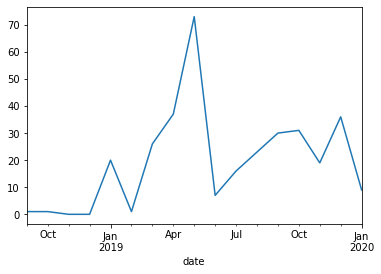

In [62]:
vb.set_index('date').resample('M', how='count').status.plot()

In [63]:
vb

,date,status,text,photo,parti
id,,,,,
2456367091344308,2020-01-14,Actif,Tijd voor échte verandering. Ook in Geraardsbe...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
2521655651492982,2020-01-13,Inactive,"Ondanks eerdere beloftes om niet te besparen, ...",https://scontent.fgva1-1.fna.fbcdn.net/v/t1.64...,Vlaams Belang
3173937022621410,2020-01-11,Actif,Terwijl poetshulpen staken voor 1% loonopslag ...,NaN,Vlaams Belang
503233856995441,2020-01-08,Actif,HALLUCINANT. Een gezin dat ILLEGAAL in het lan...,NaN,Vlaams Belang
510651559810052,2020-01-08,Inactive,Heeft iemand de Koksijdenaren gevraagd of ze e...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
...,...,...,...,...,...
301916850729576,2019-01-07,Inactive,"Immigratie kost € 7,2 miljard/jaar, terwijl on...",https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
314573155875863,2019-01-06,Inactive,LIKE als je het eens bent!,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
771284619895377,2019-01-04,Inactive,Stop met het importeren van armoede en bescher...,https://scontent.fgva1-1.fna.fbcdn.net/v/t39.1...,Vlaams Belang
